In [1]:
import numpy as np
import os
import PIL
import PIL.Image
from PIL import ImageDraw
import tensorflow as tf
import tensorflow_datasets as tfds
import pandas as pd
from tqdm import tqdm
import random
import data_process
import matplotlib.pyplot as plt
import cv2

In [23]:
landmarks = pd.read_csv('../data/images/20220725235319.257/20220725235319.257.csv')

(-0.5, 479.5, 639.5, -0.5)

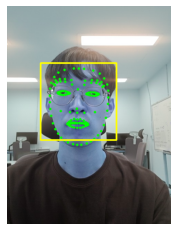

In [63]:
# plt에서 rgb 반대로 나와서 변환처리 필요
img = cv2.imread('../data/images/20220725235319.257/20220725235319.267.jpg', cv2.IMREAD_COLOR)
drawing_image = img.copy()
order = 0
landmark_points = [point for point in landmarks.columns if "-" in point]
for p in range(0, 266, 2):
    radius = 2
    x = landmarks.iloc[order][landmark_points[p]]
    y = landmarks.iloc[order][landmark_points[p+1]]
    # print(x,y)
    cv2.circle(drawing_image, center= tuple([int(x),int(y)]), radius=3, color=(0,255,0), thickness=-1, lineType=cv2.LINE_AA)
# img_show(drawing_image)
left = landmarks.iloc[order]['left']
top = landmarks.iloc[order]['top']
right = landmarks.iloc[order]['right']
bottom = landmarks.iloc[order]['bottom']
cv2.rectangle(drawing_image, (int(left), int(top)), (int(right), int(bottom)), (255, 255, 0), 3)
plt.imshow(drawing_image)
plt.axis('off')

In [24]:
landmark_points = [point for point in landmarks.columns if "-" in point]
len(landmark_points)

266

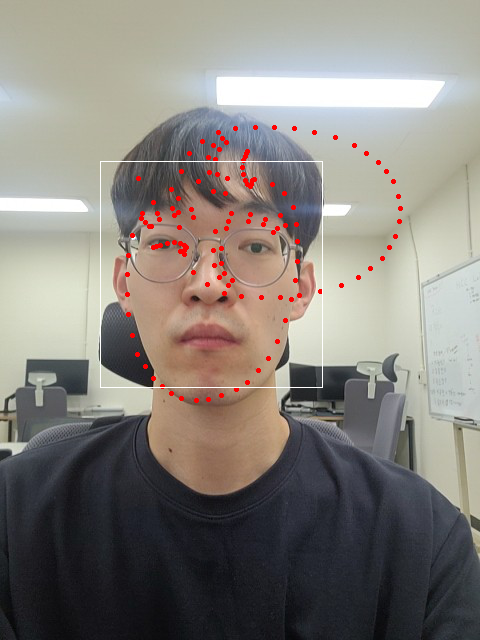

In [32]:
img = PIL.Image.open('../data/images/20220725235319.257/20220725235319.519.jpg')
order = 4
# img = img.resize((960, 1280))
draw = ImageDraw.Draw(img)
landmark_points = [point for point in landmarks.columns if "-" in point]
for p in range(int(len(landmark_points)/2)):
    radius = 2
    draw.ellipse((landmarks.iloc[order][landmark_points[p+1]]-radius, landmarks.iloc[order][landmark_points[p]]-radius, landmarks.iloc[order][landmark_points[p+1]]+radius, landmarks.iloc[order][landmark_points[p]]+radius), fill="red")
# draw.line((0, 0, img.size[0], img.size[1]), fill="red", width=5)
draw.rectangle((landmarks.iloc[order]['left'], landmarks.iloc[order]['top'], landmarks.iloc[order]['right'], landmarks.iloc[order]['bottom']))
# draw.line((0, img.size[1], img.size[0], 0), fill="red", width=5)
img